Next steps:
- [x] Add legend
- [ ] Adjust positioning of the graph nodes. I.e., internal inputs (blue) at the top and key outputs (green) at the bottom
- [ ] [Code cleaning and robusting]...
- [ ] Jacques review
- [ ] [Some more code cleaning and robusting]...
- [ ] Add unit tests

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from pathlib import Path
from core.trbs import TheResponsibleBusinessSimulator
import math 
import numpy as np
from collections import defaultdict

def determine_category(node):
    if node in input_dict["key_outputs"]:
        return "key_output"
    elif node in input_dict["internal_variable_inputs"]:
        return "internal_input"
    elif node in input_dict["external_variable_inputs"]:
        return "external_input"
    elif node in input_dict["fixed_inputs"]:
        return "fixed_input"
    else:
        return "intermediate"

def category_color(node):
    category_is = determine_category(node)
    if category_is == 'fixed_input':
        return 'yellow'
    elif category_is == 'external_input':
        return 'orange'
    elif category_is == 'internal_input':
        return 'blue'
    elif category_is == 'key_output':
        return 'green'
    else:
        # intermediaries and other unaccounted categories
        return 'grey' 

## Toy Example:
### Farmer has TWO choices:

1. Invest in Apples
2. Invest in Machinery

In [29]:
# Read the CSV file
data = pd.read_csv('data/toy/csv/dependencies.csv')

path = Path.cwd() / 'data'
file_format = 'xlsx'
name = 'toy'

case = TheResponsibleBusinessSimulator(path, file_format, name)
case.build()
data = pd.DataFrame({'argument_1': case.input_dict['argument_1'], 'operator': case.input_dict['operator'], 
              'argument_2': case.input_dict['argument_2'], 'destination': case.input_dict['destination']})
data

Creating 'toy'
Hierarchy calculated in 2 iterations


,argument_1,operator,argument_2,destination
0,investment in apples,*,% ROI apples,profit
1,investment in machinery,*,% ROI machinery,profit
2,investment in machinery,/,cost of machines,number of machines
3,number of machines,*,efficiency per machine,efficiency


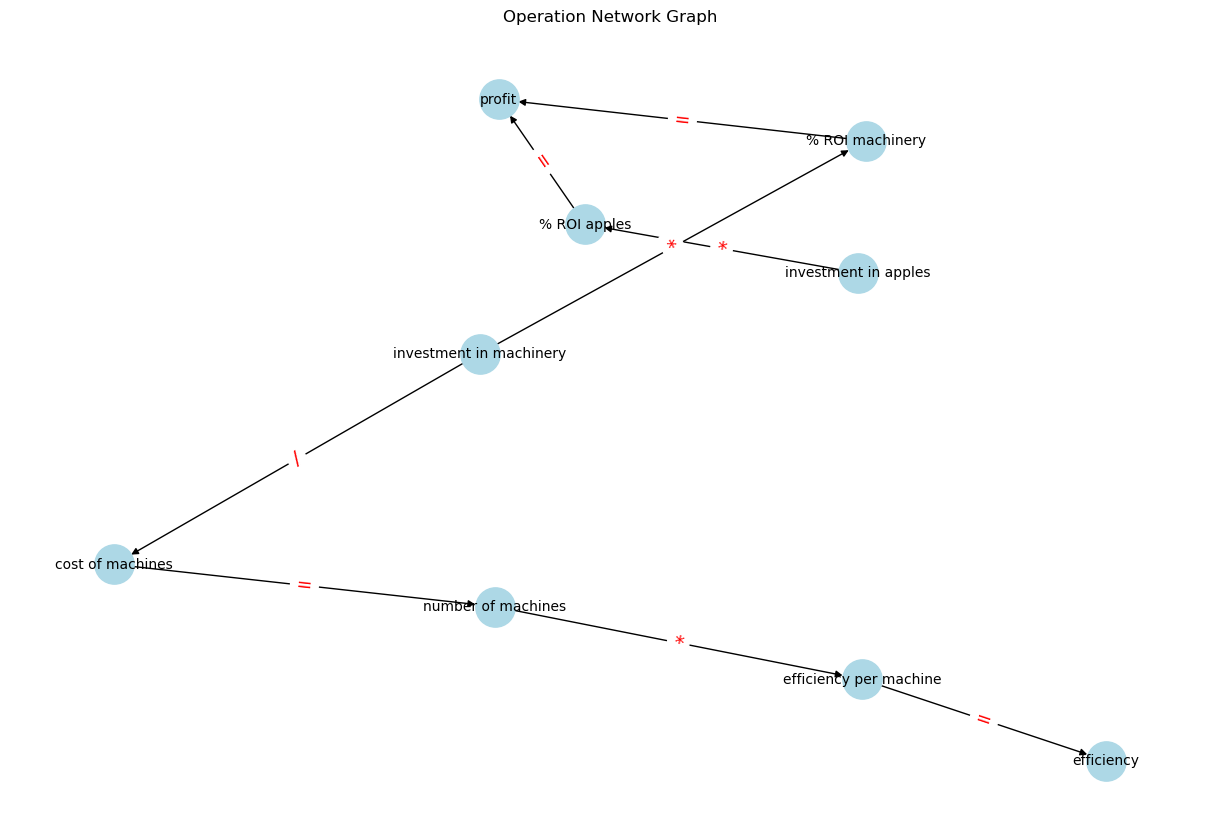

In [30]:
# Initialize a directed graph
G = nx.DiGraph()

# Iterate through the rows of the DataFrame to add nodes and edges
for index, row in data.iterrows():
    destination = row['destination']
    argument_1 = row['argument_1']
    argument_2 = row['argument_2']
    operator = row['operator']
    
    # Add nodes for destination, argument_1, and argument_2
    G.add_node(destination)
    G.add_node(argument_1)
    G.add_node(argument_2)
    
    # Add an edge from argument_1 to destination with the operator as the label
    if pd.isna(argument_1):
        G.add_edge(argument_2, destination, operator='squeezed')
    elif pd.isna(argument_2):
        G.add_edge(argument_1, destination, operator='squeezed')
    else:
        G.add_edge(argument_1, argument_2, operator=operator)
        # Later make function so that based on category, we make the edge to destination
        G.add_edge(argument_2, destination, operator='=')

# Define the layout for the graph (you can use different layouts)
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, font_color='black')
edge_labels = nx.get_edge_attributes(G, 'operator')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14, font_color='red')
plt.title('Operation Network Graph')
plt.show()


In [31]:
# Initialize a directed graph
G = nx.DiGraph()

input_dict = case.input_dict

# Iterate through the rows of the DataFrame to add nodes and edges
for index, row in data.iterrows():
    destination = row['destination']
    argument_1 = row['argument_1']
    argument_2 = row['argument_2']
    operator = row['operator']
    
    # Add nodes for destination, argument_1, and argument_2
    G.add_node(destination, color = category_color(destination))
    G.add_node(argument_1, color = category_color(argument_1))
    G.add_node(argument_2, color = category_color(argument_2))
    
    # Add an edge from argument_1 to destination with the operator as the label
    if pd.isna(argument_1):
        G.add_edge(argument_2, destination, label='squeezed', color='black')
    elif pd.isna(argument_2):
        G.add_edge(argument_1, destination, label='squeezed', color='black')
    else:
        G.add_edge(argument_1, argument_2, label=operator, color='black')
        # Later make function so that based on category, we make the edge to destination
        G.add_edge(argument_2, destination, label='=', color='black')

In [32]:
# Define the layout for the graph (you can use different layouts)
pos = nx.spectral_layout(G)

net = Network(notebook=True, cdn_resources='remote')
net.from_nx(G)
net.show_buttons()
net.show("example.html")

example.html


## Nyenrode Exercise case

In [2]:
# Read the CSV file
data = pd.read_csv('data/toy/csv/dependencies.csv')

path = Path.cwd() / 'data'
file_format = 'xlsx'
name = 'FinalTemplate'

case = TheResponsibleBusinessSimulator(path, file_format, name)
case.build()

data = pd.DataFrame({'argument_1': case.input_dict['argument_1'], 'operator': case.input_dict['operator'], 
              'argument_2': case.input_dict['argument_2'], 'destination': case.input_dict['destination']})

Creating 'FinalTemplate'
Hierarchy calculated in 4 iterations


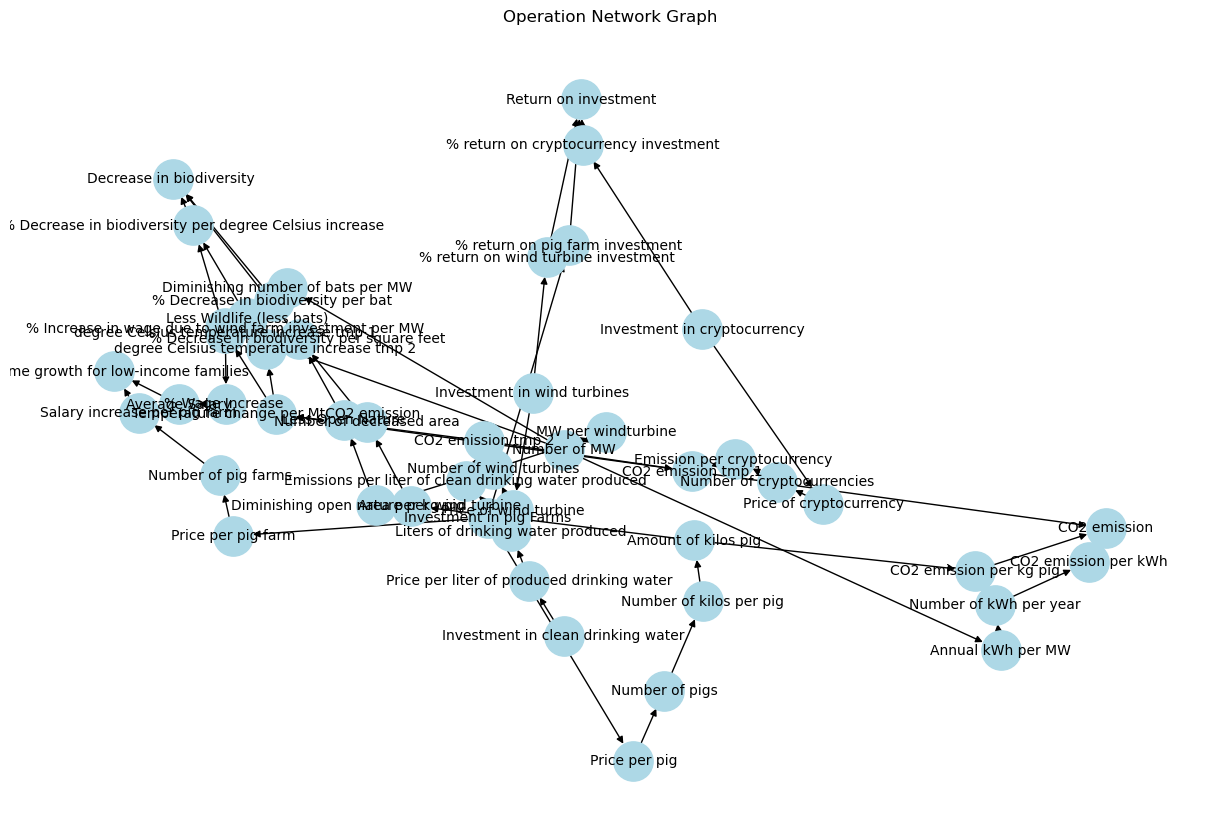

In [4]:
# Initialize a directed graph
G = nx.DiGraph()

input_dict = case.input_dict

# Iterate through the rows of the DataFrame to add nodes and edges
for index, row in data.iterrows():
    destination = row['destination']
    argument_1 = row['argument_1']
    argument_2 = row['argument_2']
    operator = row['operator']
    
    # Add nodes for destination, argument_1, and argument_2
    G.add_node(destination, color = category_color(destination))
    
    # Add an edge from argument_1 to destination with the operator as the label
    if pd.isnull(argument_1):
        print(argument_2, category_color(argument_2))
        G.add_node(argument_2, color = category_color(argument_2))
        G.add_edge(argument_2, destination, label=operator, color='black')
    elif pd.isnull(argument_2):
        print(argument_1, category_color(argument_1))
        G.add_node(argument_1, color = category_color(argument_1))
        G.add_edge(argument_1, destination, label=operator, color='black')
    else:
        G.add_node(argument_1, color = category_color(argument_1))
        G.add_node(argument_2, color = category_color(argument_2))
        G.add_edge(argument_1, argument_2, label=operator, color='black')
        # Later make function so that based on category, we make the edge to destination
        G.add_edge(argument_2, destination, label='=', color='black')
        
# Define the layout for the graph (you can use different layouts)
pos = nx.spring_layout(G, seed=42)

# Draw the graph (STATIC)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, font_color='black')
edge_labels = nx.get_edge_attributes(G, 'operator')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14, font_color='red')
plt.title('Operation Network Graph')
plt.show()

# # Draw the graph (DYNAMIC)
# net = Network(notebook=True, cdn_resources='remote')
# net.from_nx(G)
# net.show_buttons()
# net.show("example.html")

## For the beerwiser case

In [35]:
# Read the CSV file
data = pd.read_csv('data/toy/csv/dependencies.csv')

path = Path.cwd() / 'data'
file_format = 'xlsx'
name = 'beerwiser'

case = TheResponsibleBusinessSimulator(path, file_format, name)
case.build()

data = pd.DataFrame({'argument_1': case.input_dict['argument_1'], 'operator': case.input_dict['operator'], 
              'argument_2': case.input_dict['argument_2'], 'destination': case.input_dict['destination']})
data

Creating 'beerwiser'
Hierarchy calculated in 5 iterations


,argument_1,operator,argument_2,destination
0,Invest in training of employees,squeezed *,NaN,Accidents reduction %
1,Invest in water recycling,squeezed *,NaN,Water use reduction % when effective
2,Invest in training of employees,/,# employees,Cost of training per employee
3,Water use reduction % when effective,*,Effectiveness water recycling,Water use reduction %
4,Current # accidents,*,Accidents reduction %,Accidents reduction
5,Water use reduction %,*,Current water use,Water use reduction
6,Accidents reduction,*,Cost of accident,Production cost reduction $
7,Current # accidents,-,Accidents reduction,New # accidents
8,Water use reduction,*,Water unit cost,Production cost reduction $
9,Current water use,-,Water use reduction,New water use


In [36]:
# Initialize a directed graph
G = nx.DiGraph()

input_dict = case.input_dict

# Iterate through the rows of the DataFrame to add nodes and edges
for index, row in data.iterrows():
    destination = row['destination']
    argument_1 = row['argument_1']
    argument_2 = row['argument_2']
    operator = row['operator']
    
    # Add nodes for destination, argument_1, and argument_2
    G.add_node(destination, color = category_color(destination))
    
    # Add an edge from argument_1 to destination with the operator as the label
    if pd.isnull(argument_1):
        print(argument_2, category_color(argument_2))
        G.add_node(argument_2, color = category_color(argument_2))
        G.add_edge(argument_2, destination, label=operator, color='black')
    elif pd.isnull(argument_2):
        print(argument_1, category_color(argument_1))
        G.add_node(argument_1, color = category_color(argument_1))
        G.add_edge(argument_1, destination, label=operator, color='black')
    else:
        G.add_node(argument_1, color = category_color(argument_1))
        G.add_node(argument_2, color = category_color(argument_2))
        G.add_edge(argument_1, argument_2, label=operator, color='black')
        # Later make function so that based on category, we make the edge to destination
        G.add_edge(argument_2, destination, label='=', color='black')
 

Invest in training of employees blue
Invest in water recycling blue


In [37]:
       
# Define the layout for the graph (you can use different layouts)
pos = nx.spring_layout(G, seed=42)

net = Network(notebook=True, cdn_resources='remote')
net.from_nx(G)
net.show_buttons()
net.show("example.html")

example.html


# Hierarchy

In [ ]:
# Read the CSV file
data = pd.read_csv('data/toy/csv/dependencies.csv')

path = Path.cwd() / 'data'
file_format = 'xlsx'
name = 'FinalTemplate'

case = TheResponsibleBusinessSimulator(path, file_format, name)
case.build()

In [48]:
# Initialize a directed graph
G = nx.DiGraph()

# Create a new dict with only the data fields necessary for the dependency tree
your_keys = ['argument_1', 'argument_2', 'destination', 'operator', 'hierarchy', 'dependencies_order']
new_dict = {key: case.input_dict[key] for key in your_keys}
data = pd.DataFrame.from_dict(new_dict)

# Create a dictionary to store node levels based on their categories
node_levels = {
    'fixed_input': 1,
    'external_input': 1,
    'internal_input': 0,
    'key_output': 3,
    'intermediate': 2  # You can adjust this level as needed
}

# Iterate through the rows of the DataFrame to add nodes and edges
for index, row in data.iterrows():
    destination = row['destination']
    argument_1 = row['argument_1']
    argument_2 = row['argument_2']
    operator = row['operator']
    row_level = row['hierarchy']
    
    # Determine the category of each node
    dest_category = determine_category(destination)
    arg1_category = determine_category(argument_1)
    arg2_category = determine_category(argument_2)
    
#     # OPTION 1: Determine levels for each node based on their categories
#     dest_level = node_levels[dest_category]
#     arg1_level = node_levels[arg1_category]
#     arg2_level = node_levels[arg2_category]
    
    # OPTION 2: Determine level based on the hierarchy column in the data: row['hierarchy']
    dest_level = arg1_level = arg2_level = row_level
    
    # Add nodes for destination, argument_1, and argument_2 with levels
    G.add_node(destination, color=category_color(destination), level=(dest_level, 1))
    G.add_node(argument_1, color=category_color(argument_1), level=(arg1_level, 0))
    G.add_node(argument_2, color=category_color(argument_2), level=(arg2_level, 0))
    
    # Add edges from argument nodes to the destination node with levels
    if pd.isna(argument_1):
        G.add_edge(argument_2, destination, label='squeezed', color='black')
    elif pd.isna(argument_2):
        G.add_edge(argument_1, destination, label='squeezed', color='black')
    else:
        G.add_edge(argument_1, argument_2, label=operator, color='black')
        G.add_edge(argument_2, destination, label='=', color='black')

In [40]:
G.nodes['Return on investment']['level'] = 6

In [22]:
legend_dict = {
    'Fixed input': 'yellow', 
    'Internal input': 'blue', 
    'External input': 'orange', 
    'Output': 'green', 
    'Intermediate': 'grey'
}

def create_legend(legend_dict):
    handles = []
    labels = []
    for category, color in legend_dict.items():
        handles.append(plt.Line2D([0], [0], color=color, marker='o', markersize=10, linewidth=0))
        labels.append(f'{category}')
    return handles, labels

In [49]:
# Create a dictionary to store nodes at each level
nodes_by_level = defaultdict(list)
for node in G.nodes():
    level = G.nodes[node]['level']
    nodes_by_level[level].append(node)
nodes_by_level

defaultdict(list,
            {(1, 1): ['Return on investment'],
             (1, 0): ['Investment in wind turbines',
              '% return on wind turbine investment',
              'Investment in cryptocurrency',
              '% return on cryptocurrency investment',
              'Investment in pig Farms',
              '% return on pig farm investment',
              'Investment in clean drinking water',
              'Price per liter of produced drinking water',
              'Price per pig farm',
              'Price of cryptocurrency',
              'Price per pig',
              'Price of wind turbine'],
             (2, 0): ['Liters of drinking water produced',
              'Number of pig farms',
              'Number of cryptocurrencies',
              'Number of pigs',
              'Number of wind turbines',
              'Diminishing open nature per wind turbine',
              'Number of kilos per pig',
              'Salary increase per pig farm',
              'Emiss

In [53]:
[(i - (5 - 1) / 2) * x_spacing for i in range(5)]

[-2.0, -1.0, 0.0, 1.0, 2.0]

In [56]:
pos = {}
x_spacing = 1.0  # Adjust this value for spacing between nodes at the same level
y_spacing = 2.0  # Adjust this value for vertical spacing between levels
for level, nodes in nodes_by_level.items():
    num_nodes = len(nodes)
    print(level[1])

1
0
0
0
1
0


In [68]:
nx.flow_hierarchy(G)

1.0

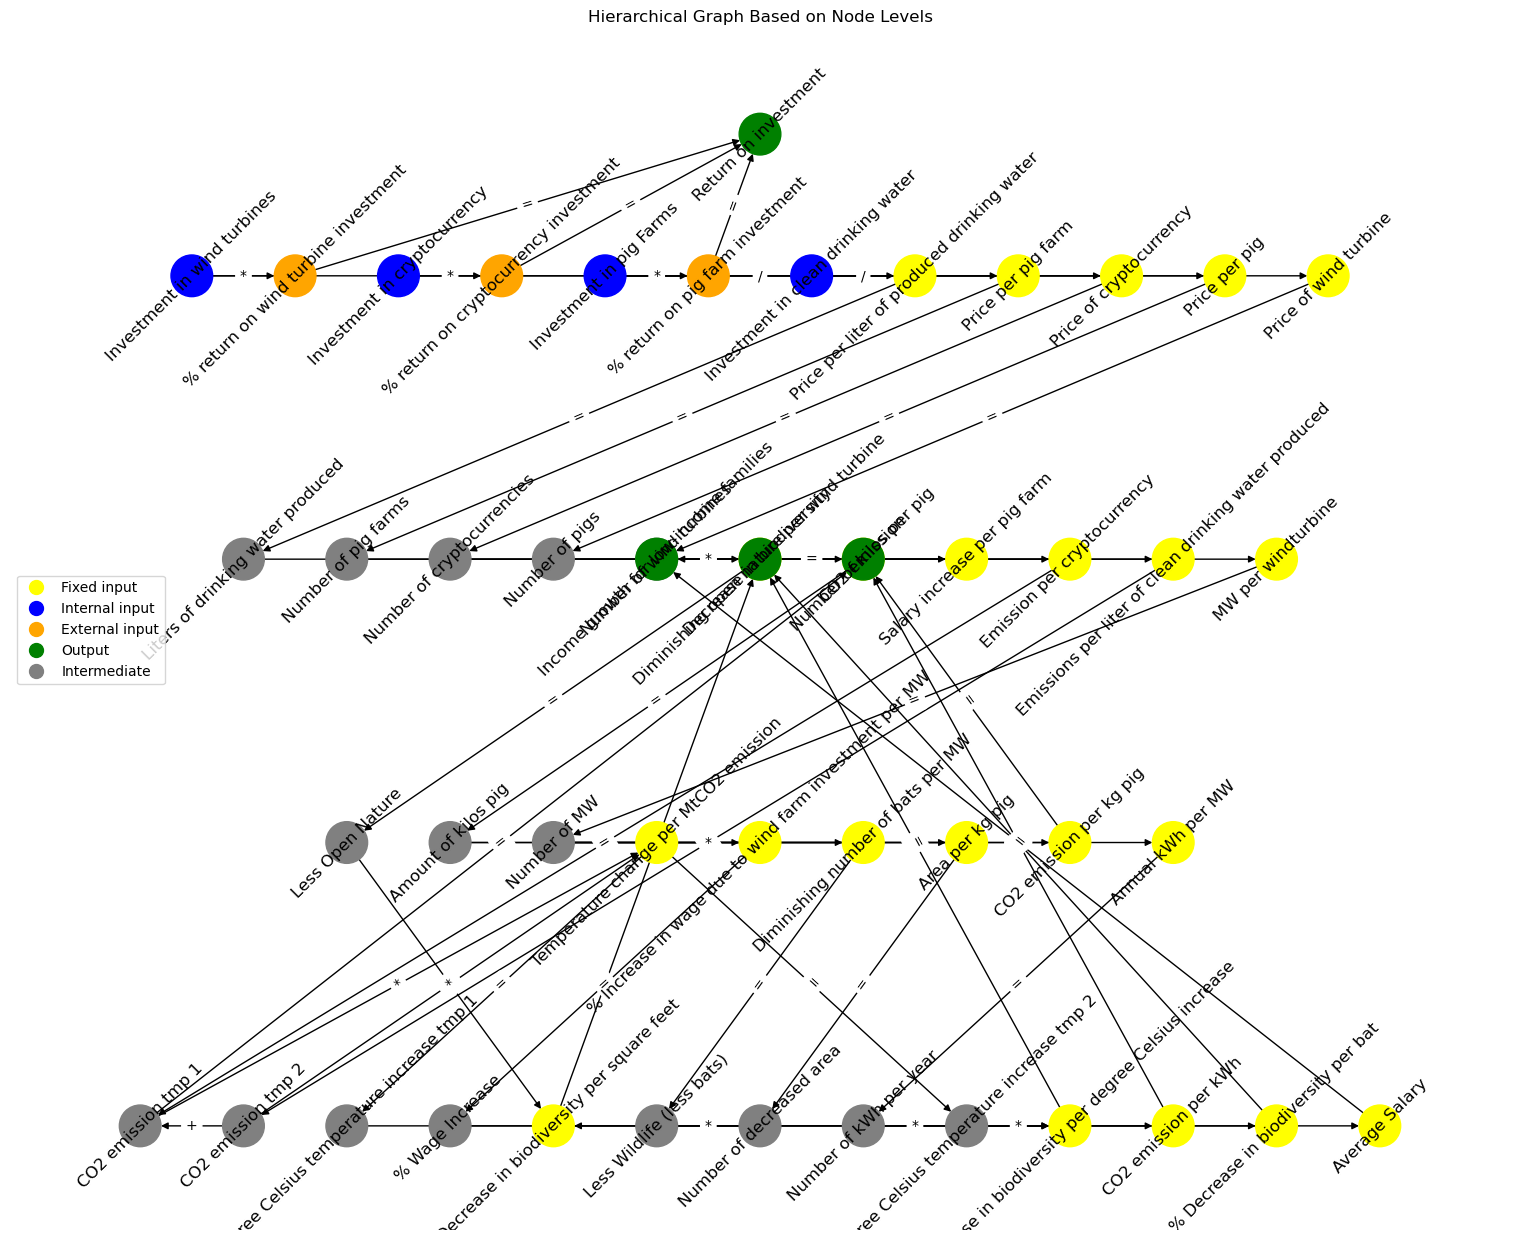

In [67]:
# Create a dictionary to store nodes at each level
nodes_by_level = defaultdict(list)
for node in G.nodes():
    level = G.nodes[node]['level']
    nodes_by_level[level].append(node)
    
    # Create positions for nodes in the hierarchical layout
pos = {}
x_spacing = 10  # Adjust this value for spacing between nodes at the same level
y_spacing = 2.0  # Adjust this value for vertical spacing between levels
for level, nodes in nodes_by_level.items():
    num_nodes = len(nodes)
    x_values = [(i - (num_nodes - 1) / 2) * x_spacing for i in range(num_nodes)]
    if level[1] == 1: # if the node is a destination 
        y_value = -level[0] * y_spacing/2  
    else: # if the node is not a destination
        y_value = -level[0] * y_spacing  
    pos.update((node, (x, y_value)) for node, x in zip(nodes, x_values))

# Plot the graph
edge_labels = {(u, v): d["label"] for u, v, d in G.edges(data=True)}
node_colors = [G.nodes[node]["color"] for node in G.nodes()]

plt.figure(figsize=(15, 12))

# with_labels=False because of rotating the node labels
nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=900, font_size=8)

text = nx.draw_networkx_labels(G, pos)
# Rotate the node labels 
for _, t in text.items():
    t.set_rotation(45) 
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Create and add legend
legend_handles, legend_labels = create_legend(legend_dict)

plt.title("Hierarchical Graph Based on Node Levels")
plt.legend(legend_handles, legend_labels, loc='center left')
plt.axis('off')  # Turn off axis for cleaner display
plt.show()

## Hierarchy (part 2)

In [5]:
# Read the data and build the case
path = Path.cwd() / 'data'
file_format = 'xlsx'
name = 'FinalTemplate'
case = TheResponsibleBusinessSimulator(path, file_format, name)
case.build()

# Create a new dict with only the data fields necessary for the dependency tree
your_keys = ['argument_1', 'argument_2', 'destination', 'operator', 'hierarchy', 'dependencies_order']
new_dict = {key: case.input_dict[key] for key in your_keys}
data = pd.DataFrame.from_dict(new_dict)

Creating 'FinalTemplate'
Hierarchy calculated in 4 iterations


In [7]:
# Initialize a directed graph
G = nx.DiGraph()

# input_dict is used in the determine_category() 
input_dict = case.input_dict

# Iterate through the rows of the DataFrame to add nodes and edges
for index, row in data.iterrows():
    destination = row['destination']
    argument_1 = row['argument_1']
    argument_2 = row['argument_2']
    operator = row['operator']
    row_level = row['hierarchy']
    
    # Determine the category of each node
    dest_category = determine_category(destination)
    arg1_category = determine_category(argument_1)
    arg2_category = determine_category(argument_2)

    # Add nodes for destination, argument_1, and argument_2 
    G.add_node(destination, color=category_color(destination))
    G.add_node(argument_1, color=category_color(argument_1))
    G.add_node(argument_2, color=category_color(argument_2))
    
    # Add edges from argument nodes to the destination node with levels
    if pd.isna(argument_1):
        G.add_edge(argument_2, destination, label='squeezed', color='black')
    elif pd.isna(argument_2):
        G.add_edge(argument_1, destination, label='squeezed', color='black')
    else:
        G.add_edge(argument_1, destination, label=operator, color='black')
        G.add_edge(argument_2, destination, label=operator, color='black')

In [8]:
legend_dict = {
    'Fixed input': 'yellow', 
    'Internal input': 'blue', 
    'External input': 'orange', 
    'Output': 'green', 
    'Intermediate': 'grey'
}

def create_legend(legend_dict):
    handles = []
    labels = []
    for category, color in legend_dict.items():
        handles.append(plt.Line2D([0], [0], color=color, marker='o', markersize=10, linewidth=0))
        labels.append(f'{category}')
    return handles, labels

In [13]:
x_spacing = 1  # Adjust this value for spacing between levels
y_spacing = 5.0  # Adjust this value for vertical spacing between nodes at the same level
for level, nodes in nodes_by_level.items():
    num_nodes = len(nodes)
    x_value = level * x_spacing
    y_values = [(i - (num_nodes - 1) / 2) * y_spacing for i in range(num_nodes)]
    print(y_values)

[-70.0, -65.0, -60.0, -55.0, -50.0, -45.0, -40.0, -35.0, -30.0, -25.0, -20.0, -15.0, -10.0, -5.0, 0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0]
[-12.5, -7.5, -2.5, 2.5, 7.5, 12.5]
[-10.0, -5.0, 0.0, 5.0, 10.0]
[-12.5, -7.5, -2.5, 2.5, 7.5, 12.5]
[-5.0, 0.0, 5.0]


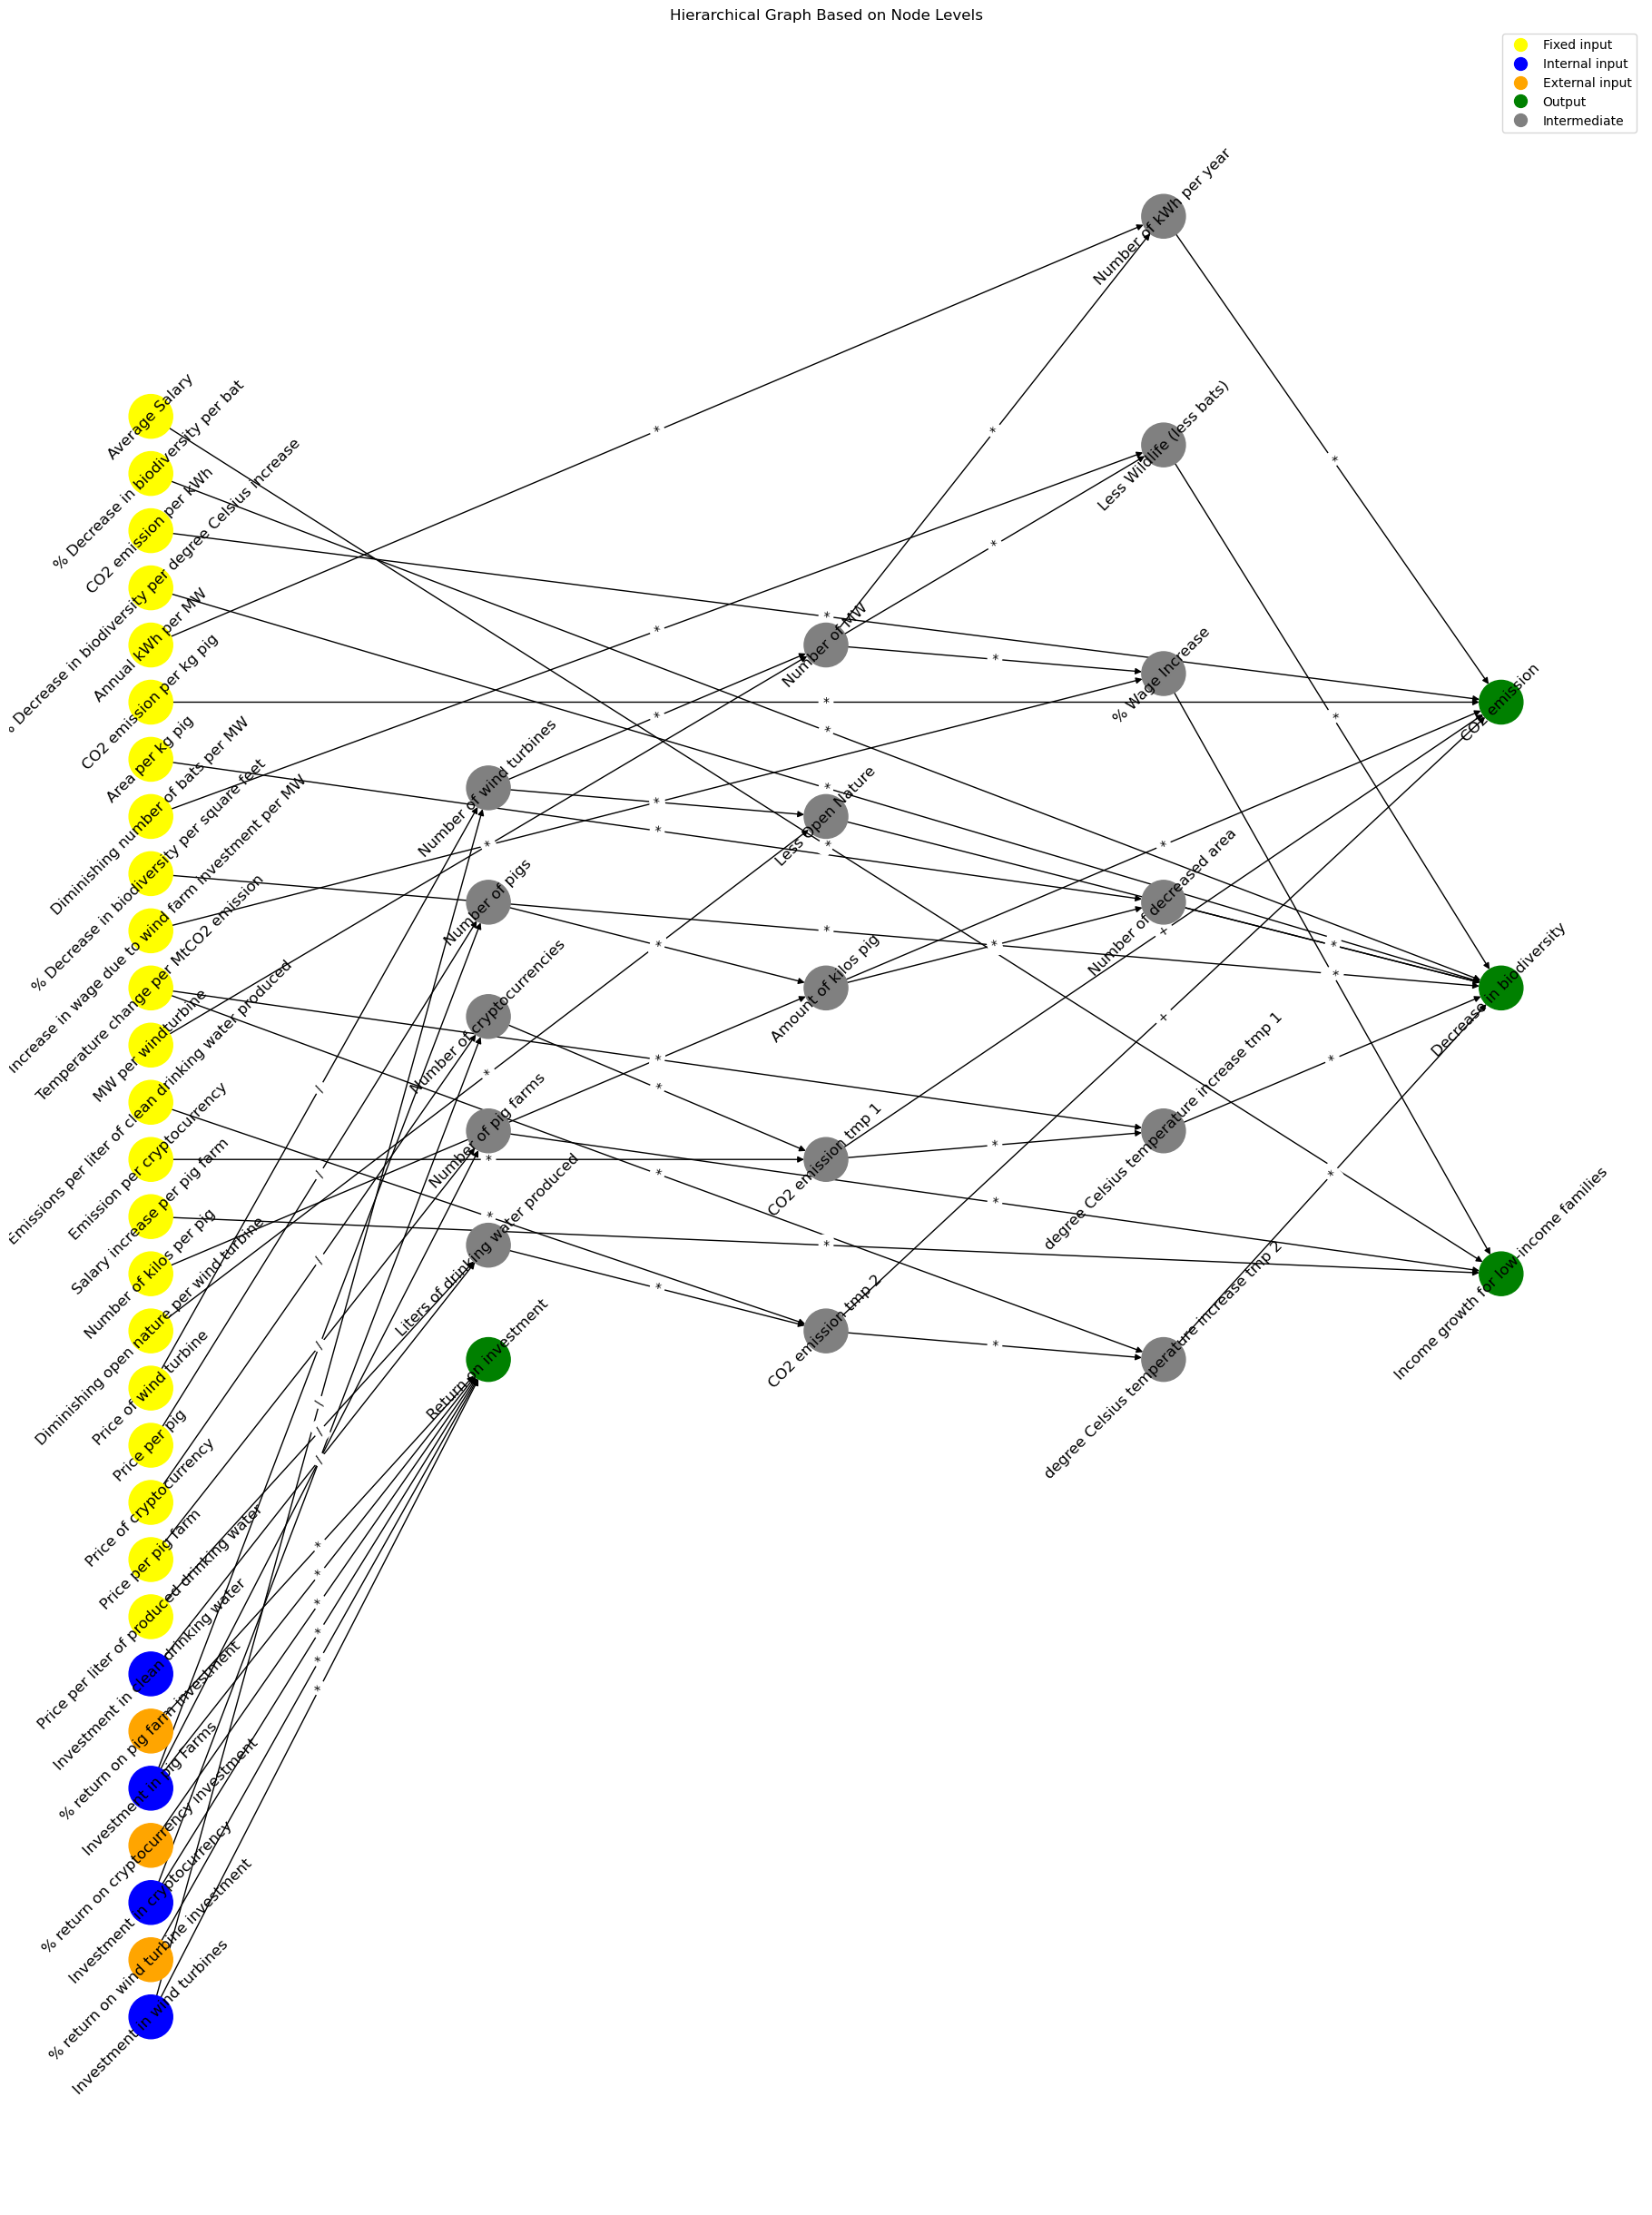

In [34]:
# Create a dictionary to store nodes at each level
nodes_by_level = defaultdict(list)
for i, node_list in enumerate(nx.topological_generations(G)):
    for node in node_list:
        level = i
        nodes_by_level[level].append(node)
    
    # Create positions for nodes in the hierarchical layout
pos = {}

# TOP DOWN

# x_spacing = 10  # Adjust this value for spacing between nodes at the same level
# y_spacing = 5.0  # Adjust this value for vertical spacing between levels
# for level, nodes in nodes_by_level.items():
#     num_nodes = len(nodes)
#     x_values = [(i - (num_nodes - 1) / 2) * x_spacing for i in range(num_nodes)]
#     y_value = -level * y_spacing  
#     pos.update((node, (x, y_value)) for node, x in zip(nodes, x_values))

# LEFT TO RIGHT

x_spacing = 1  # Adjust this value for spacing between levels
y_spacing = 5.0  # Adjust this value for vertical spacing between nodes at the same level
for level, nodes in nodes_by_level.items():
    num_nodes = len(nodes)
    x_value = level * x_spacing
    y_values = [(i*(level + 1) - (num_nodes - 1) / 2) * y_spacing for i in range(num_nodes)]
    pos.update((node, (x_value, y_value)) for node, y_value in zip(nodes, y_values))
    
# Plot the graph
edge_labels = {(u, v): d["label"] for u, v, d in G.edges(data=True)}
node_colors = [G.nodes[node]["color"] for node in G.nodes()]

plt.figure(figsize=(18, 24))

# with_labels=False because of rotating the node labels
nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=1200, font_size=10)

text = nx.draw_networkx_labels(G, pos)
# Rotate the node labels 
for _, t in text.items():
    t.set_rotation(45) 
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Create and add legend
legend_handles, legend_labels = create_legend(legend_dict)

plt.title("Hierarchical Graph Based on Node Levels")
plt.legend(legend_handles, legend_labels, loc='upper right')
plt.axis('off')  # Turn off axis for cleaner display
plt.show()